# Task C. Computational Modeling: Implement a phrase segmentation algorithm
1. Informed by your previous findings, implement a simple phrase segmentation algorithm `Model_P` that outputs phrase boundaries using only performance attributes.
2. Compare your model-predicted phrases with the ones marked by yourselves.
3. Implement another phrase segmentation algorithm to either
  - detect phrases in unperformed scores, or
  - improve `Model_P` by using score attributes.
4. Run both of your algorithms on a larger suitable corpus chosen by you. Give statistics on the number of phrases detected per piece and additional suitable statistics. Discuss your results and give a brief qualitative assessment of your algorithm's performance on one new piece. Discuss general perspectives on improving phrase detection even further.

In [ ]:
# Install dependencies
!pip install music21
!apt install musescore3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  desktop-file-utils fonts-freefont-ttf libevdev2 libgudev-1.0-0 libinput-bin libinput10 libmd4c0
  libmtdev1 libpoppler-qt5-1 libportaudio2 libportmidi0 libqt5core5a libqt5dbus5 libqt5gui5
  libqt5help5 libqt5network5 libqt5printsupport5 libqt5qml5 libqt5qmlmodels5 libqt5qmlworkerscript5
  libqt5quick5 libqt5sql5 libqt5sql5-sqlite libqt5svg5 libqt5widgets5 libqt5xml5 libqt5xmlpatterns5
  libwacom-bin libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1 libxkbcommon-x11-0
  musescore-general-soundfont-small musescore3-common qml-module-qt-labs-folderlistmodel
  qml-module-qt-labs-settings qml-module-qtgraphicaleffects qml-module-qtqml
  qml-module-qtqml-models2 qml-module-qtquick-controls qml-module-qtquick-dialogs
  qml-module-qtquick-layouts 

In [ ]:
# Import libraries
import os
import music21
from music21 import converter, chord, note, stream, metadata

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the path if necessary:
root_dir = '/content/drive/Shareddrives/dh401_digital_musicology/asap-dataset-master/Mozart/Piano_Sonatas/8-1/'
os.chdir(root_dir)
!ls

Bogdanovitch01_annotations.txt	LEE_J03.mid		    Rozanski02_annotations.txt
Bogdanovitch01.mid		Lo01_annotations.txt	    Rozanski02.mid
Jia01_annotations.txt		Lo01.mid		    xml_score.musicxml
Jia01.mid			midi_score_annotations.txt
LEE_J03_annotations.txt		midi_score.mid


In [ ]:
# Change the file names if necessary:
unperformed_file = root_dir + 'midi_score.mid'
performed_file = root_dir + 'Jia01.mid'

In [ ]:
# Load the MIDI file using music21
unperformed_midi = converter.parse(unperformed_file)
performed_midi = converter.parse(performed_file)

In [ ]:
# performed_midi.show('text')

## Task C.1. Detect phrase boundaries based on Velocity

In [ ]:
def Model_P_velocity(midi_score):
    """
    Find phrase boundaries based on velocity changes in performed MIDI.

    Args:
        midi_score (music21.stream.Score): Performed MIDI file.

    Returns:
        list: List of measure numbers where boundaries occur.
    """
    last_velocity = None
    measure_boundaries = []

    # Iterate through each part
    for part in midi_score:
        # Skip metadata parts
        if isinstance(part, metadata.Metadata):
            continue

        # Iterate through each measure
        for measure in part:
            # Iterate through each note and chord
            for element in measure:
                if isinstance(element, music21.note.Note) or isinstance(element, music21.chord.Chord):
                    # Check if there is a big change in velocity
                    if last_velocity is None or abs(element.volume.velocity - last_velocity) > 10:
                        # Append the measure number in the list if it's not already there
                        if element.measureNumber not in measure_boundaries:
                            measure_boundaries.append(element.measureNumber)

                    # Update the last velocity
                    last_velocity = element.volume.velocity

    return measure_boundaries

In [ ]:
len(Model_P_velocity(performed_midi))

29

In [ ]:
print(Model_P_velocity(performed_midi))

[2, 9, 11, 15, 16, 17, 22, 29, 34, 41, 49, 51, 54, 55, 56, 62, 68, 75, 79, 81, 83, 85, 87, 89, 91, 95, 106, 107, 111]


In [ ]:
len(Model_P_velocity(unperformed_midi))

22

In [ ]:
print(Model_P_velocity(unperformed_midi))

[1, 5, 9, 15, 16, 18, 20, 22, 54, 55, 56, 62, 66, 84, 88, 99, 101, 103, 6, 23, 85, 104]


## Task C.2. Compare self-marked boundaries with Model_P_velocity boundaries

In [ ]:
model_boundaries = {1, 5, 9, 15, 16, 18, 20, 22, 54, 55, 56, 62, 66, 84, 88, 99, 101, 103, 6, 23, 85, 104}
self_marked_boundaries = {5, 9, 16, 22, 35, 40, 49, 58, 62, 66, 70, 80, 84, 88, 94, 97, 101, 103}

# Common boundaries
intersection = model_boundaries.intersection(self_marked_boundaries)

# Boundaries unique to the model (False Positives)
model_unique = model_boundaries.difference(self_marked_boundaries)

# Boundaries missed by the model (Misses)
self_unique = self_marked_boundaries.difference(model_boundaries)

# Calculate statistical metrics
precision = len(intersection) / len(model_boundaries)
recall = len(intersection) / len(self_marked_boundaries)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Common boundary points:", intersection)
print("Boundaries incorrectly identified by the model:", model_unique)
print("Boundaries missed by the model:", self_unique)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Common boundary points: {66, 5, 101, 103, 9, 16, 84, 22, 88, 62}
Boundaries incorrectly identified by the model: {1, 99, 6, 104, 15, 18, 20, 85, 54, 23, 55, 56}
Boundaries missed by the model: {97, 35, 70, 40, 80, 49, 58, 94}
Precision: 0.45454545454545453
Recall: 0.5555555555555556
F1 Score: 0.5


## Task C.3. Detect phrase boundaries based on velocity using SSM

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def Model_P_velocity_with_SSM_Cosine_Similarity(midi_score):
    """
    Find phrase boundaries based on velocity changes in performed MIDI using SSM,
    considering only notes and ignoring rests.

    Args:
        midi_score (music21.stream.Score): Performed MIDI file.

    Returns:
        list: List of measure numbers where boundaries occur based on SSM.
    """
    velocities = []
    measures = []

    # Collect velocities and their corresponding measure numbers
    for part in midi_score.parts:
        for measure in part.getElementsByClass('Measure'):
            for note in measure.notes:
                if note.isNote:
                    velocity = note.volume.velocity if note.volume.velocity is not None else 0
                    velocities.append(velocity)
                    measures.append(measure.number)

    # Create a matrix from the velocity values and normalize
    velocity_matrix = np.array(velocities).reshape(-1, 1)
    velocity_matrix = (velocity_matrix - np.mean(velocity_matrix)) / np.std(velocity_matrix)

    # Compute the self-similarity matrix using cosine similarity
    ssm = cosine_similarity(velocity_matrix)

    # Analyze SSM to find boundaries (significant change in similarity patterns)
    boundaries = []
    threshold = 0.1
    for i in range(1, len(ssm)):
        if np.abs(ssm[i, i-1]) < threshold:
            measure_number = measures[i]
            if measure_number not in boundaries:
                boundaries.append(measure_number)

    return boundaries

In [ ]:
boundaries = Model_P_velocity_with_SSM_Cosine_Similarity(performed_midi)

print("Detected phrase boundaries at measure numbers:", boundaries)

Detected phrase boundaries at measure numbers: []


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def Model_P_velocity_with_SSM(midi_score):
    """
    Find phrase boundaries based on velocity changes in performed MIDI using SSM,
    ignoring rests and using Euclidean distance for similarity.

    Args:
        midi_score (music21.stream.Score): Performed MIDI file.

    Returns:
        list: List of measure numbers where boundaries occur based on SSM.
    """
    velocities = []
    measures = []

    # Collect velocities and their corresponding measure numbers
    for part in midi_score.parts:
        for measure in part.getElementsByClass('Measure'):
            for note in measure.notes:
                if hasattr(note, 'volume') and note.volume.velocity is not None:
                    velocities.append(note.volume.velocity)
                    measures.append(measure.number)

    # Create a matrix from the velocity values
    velocity_matrix = np.array(velocities).reshape(-1, 1)

    # Compute the self-similarity matrix using Euclidean distance
    ssm = euclidean_distances(velocity_matrix)

    # Analyze SSM to find boundaries (change in similarity patterns)
    boundaries = []
    for i in range(1, len(ssm)):
        if np.sum(np.abs(ssm[i] - ssm[i-1])) > 0.1:
            if measures[i] not in boundaries:
                boundaries.append(measures[i])

    return boundaries

In [ ]:
boundaries_performed = Model_P_velocity_with_SSM(performed_midi)
len(boundaries_performed)

print("Detected phrase boundaries at measure numbers:", boundaries_performed)
print("Number of detected phrase boundaries:", len(boundaries_performed))

Detected phrase boundaries at measure numbers: [6, 9, 11, 15, 16, 17, 22, 26, 27, 28, 29, 34, 35, 41, 45, 46, 48, 49, 51, 54, 55, 56, 57, 58, 62, 68, 71, 72, 75, 79, 81, 83, 84, 85, 87, 89, 91, 95, 97, 98, 99, 100, 106, 107, 111, 112, 117]
Number of detected phrase boundaries: 47


In [ ]:
boundaries_unperformed = Model_P_velocity_with_SSM(unperformed_midi)
len(boundaries_unperformed)

print("Detected phrase boundaries at measure numbers:", boundaries_unperformed)
print("Number of detected phrase boundaries:", len(boundaries_unperformed))

Detected phrase boundaries at measure numbers: [5, 9, 15, 16, 18, 20, 22, 54, 55, 56, 58, 62, 66, 84, 88, 99, 101, 103, 1, 6, 23, 85, 104]
Number of detected phrase boundaries: 23


In [ ]:
model_boundaries = {5, 9, 15, 16, 18, 20, 22, 54, 55, 56, 58, 62, 66, 84, 88, 99, 101, 103, 1, 6, 23, 85, 104}
self_marked_boundaries = {5, 9, 16, 22, 35, 40, 49, 58, 62, 66, 70, 80, 84, 88, 94, 97, 101, 103}

# Common boundaries
intersection = model_boundaries.intersection(self_marked_boundaries)

# Boundaries unique to the model (False Positives)
model_unique = model_boundaries.difference(self_marked_boundaries)

# Boundaries missed by the model (Misses)
self_unique = self_marked_boundaries.difference(model_boundaries)

# Calculate statistical metrics
precision = len(intersection) / len(model_boundaries)
recall = len(intersection) / len(self_marked_boundaries)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Common boundary points:", intersection)
print("Boundaries incorrectly identified by the model:", model_unique)
print("Boundaries missed by the model:", self_unique)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Common boundary points: {66, 5, 101, 103, 9, 16, 84, 22, 88, 58, 62}
Boundaries incorrectly identified by the model: {1, 99, 6, 104, 15, 18, 20, 85, 54, 23, 55, 56}
Boundaries missed by the model: {97, 35, 70, 40, 80, 49, 94}
Precision: 0.4782608695652174
Recall: 0.6111111111111112
F1 Score: 0.5365853658536586


## Task C.3. Detect phrase boundaries based on Cadence

In [ ]:
def Model_P_cadence(midi_score):
    """
    Find measure boundaries based on chord progression in performed MIDI.

    Args:
        midi_score (music21.stream.Score): Unperformed MIDI file.

    Returns:
        list: List of measure numbers where boundaries occur.
    """
    last_element = None
    measure_boundaries = []

    # Iterate through each part
    for part in midi_score:
        # Skip metadata parts
        if isinstance(part, metadata.Metadata):
            continue

        # Iterate through each measure
        for measure in part:
            # Iterate through each chord
            for element in measure:
                if isinstance(element, music21.chord.Chord) and isinstance(last_element, music21.chord.Chord):
                    # Detect when the chord EGB and AEC are next to each other
                    # Get the pitches of the current chord and the last chord
                    last_pitches = set(p.step for p in last_element.pitches)
                    current_pitches = set(p.step for p in element.pitches)

                    # Check if either set of pitches contain the required notes
                    if ({'E', 'G', 'B'} >= current_pitches and {'A', 'E', 'C'} >= last_pitches) or ({'A', 'E', 'C'} >= current_pitches and {'E', 'G', 'B'} >= last_pitches):
                        if measure.number not in measure_boundaries:
                            measure_boundaries.append(measure.number)

                last_element = element

    return measure_boundaries

In [ ]:
len(Model_P_cadence(performed_midi))

4

In [ ]:
print(Model_P_cadence(performed_midi))

[68, 75, 81, 91]


In [ ]:
len(Model_P_cadence(unperformed_midi))

17

In [ ]:
print(Model_P_cadence(unperformed_midi))

[7, 47, 86, 131, 133, 8, 9, 20, 21, 22, 75, 77, 87, 88, 101, 102, 103]


## Task C.4. Statistics

Run both of your algorithms on a larger suitable corpus chosen by you. Give statistics on the number of phrases detected per piece and additional suitable statistics. Discuss your results and give a brief qualitative assessment of your algorithm's performance on one new piece. Discuss general perspectives on improving phrase detection even further.

In [ ]:
import os
from music21 import converter

def load_performed_midis(root_dir):
    """
    Recursively search for all performed MIDI files in the directory and subdirectories, excluding 'midi_score.mid'.
    Includes the parent directory name for each file and converts paths to music21 stream objects.

    Parameters:
    - root_dir (str): Path to the root directory to search.

    Returns:
    - dict: A dictionary where each key is a tuple (parent directory name, filename) and each value is the music21 stream object.
    """
    performed_midis = {}
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.mid') and file != 'midi_score.mid':
                parent_dir = os.path.basename(root)
                file_path = os.path.join(root, file)
                midi_stream = converter.parse(file_path)
                performed_midis[(parent_dir, file)] = midi_stream
    return performed_midis

In [ ]:
def load_non_performed_midis(root_dir):
    """
    Recursively search for all non-performed MIDI files named 'midi_score.mid' in the directory and subdirectories.
    Includes the parent directory name for each file and converts paths to music21 stream objects.

    Parameters:
    - root_dir (str): Path to the root directory to search.

    Returns:
    - dict: A dictionary where each key is a tuple (parent directory name, filename) and each value is the music21 stream object.
    """
    non_performed_midis = {}
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file == 'midi_score.mid':
                parent_dir = os.path.basename(root)
                file_path = os.path.join(root, file)
                midi_stream = converter.parse(file_path)
                non_performed_midis[(parent_dir, file)] = midi_stream
    return non_performed_midis

In [ ]:
# Change the path if necessary:
root_dir = '/content/drive/Shareddrives/dh401_digital_musicology/asap-dataset-master/Mozart/Piano_Sonatas/'
os.chdir(root_dir)
!ls

11-3  12-1  12-2  12-3	8-1


In [ ]:
performed_midis = load_performed_midis(root_dir)
print("Performed MIDI files:")
for (dir_name, file_name), midi_stream in performed_midis.items():
    print(f"'{file_name}' located in directory '{dir_name}'")

Performed MIDI files:
'Stahievitch02.mid' located in directory '11-3'
'ADIG01.mid' located in directory '12-1'
'MunA03M.mid' located in directory '12-1'
'TET01.mid' located in directory '12-1'
'WuuE02M.mid' located in directory '12-1'
'MunA04.mid' located in directory '12-2'
'WuuE03.mid' located in directory '12-2'
'BLINOV01.mid' located in directory '12-3'
'MunA05M.mid' located in directory '12-3'
'WuuE04M.mid' located in directory '12-3'
'Bogdanovitch01.mid' located in directory '8-1'
'Jia01.mid' located in directory '8-1'
'LEE_J03.mid' located in directory '8-1'
'Lo01.mid' located in directory '8-1'
'Rozanski02.mid' located in directory '8-1'


In [ ]:
non_performed_midis = load_non_performed_midis(root_dir)
print("Non-performed MIDI files:")
for (dir_name, file_name), midi_stream in non_performed_midis.items():
    print(f"'{file_name}' located in '{dir_name}'")

Non-performed MIDI files:
'midi_score.mid' located in '11-3'
'midi_score.mid' located in '12-1'
'midi_score.mid' located in '12-2'
'midi_score.mid' located in '12-3'
'midi_score.mid' located in '8-1'


### Using Model_P_velocity

In [ ]:
def apply_model_p_velocity_to_midis(midis):
    """
    Apply the Model_P_velocity function to a dictionary of MIDI streams, print and save the phrase boundaries for each MIDI file.

    Args:
        midis (dict): Dictionary with keys as (directory name, filename) and values as music21.stream.Score objects.

    Returns:
        dict: Dictionary with the same keys and values as lists of phrase boundaries.
    """
    results = {}
    for key, midi_stream in midis.items():
        # Apply the Model_P_velocity function
        boundaries = Model_P_velocity(midi_stream)

        # Print the results
        dir_name, file_name = key
        print(f"'{file_name}' in '{dir_name}' has phrase boundaries at: {boundaries}")

        # Save the results
        results[key] = boundaries

    return results

In [ ]:
print("Performed MIDI files' Phrase Boundaries using model_p_velocity:")
model_velocity_performed_results = apply_model_p_velocity_to_midis(performed_midis)

print("\nNon-Performed MIDI files' Phrase Boundaries using model_p_velocity:")
model_velocity_unperformed_results = apply_model_p_velocity_to_midis(non_performed_midis)

Performed MIDI files' Phrase Boundaries using model_p_velocity:
'Stahievitch02.mid' in '11-3' has phrase boundaries at: [4, 7, 8, 11, 16, 18, 20, 24, 25, 28, 38, 44, 46, 47, 48, 49, 50, 51, 52, 56, 57, 59, 60, 63, 67, 70, 74, 77, 78, 83, 85, 92]
'ADIG01.mid' in '12-1' has phrase boundaries at: [4, 5, 7, 9, 12, 20, 21, 22, 33, 34, 35, 36, 40, 41, 44, 45, 46, 51, 53, 56, 60, 61, 64, 66, 67, 72, 73, 75, 76, 79, 81, 96, 98, 108, 109, 110, 119, 120, 125]
'MunA03M.mid' in '12-1' has phrase boundaries at: [2, 3, 5, 18, 20, 21, 24, 27, 28, 29, 33, 35, 36, 38, 39, 44, 46, 49, 52, 56, 58, 59, 60, 61, 64, 68, 71, 72, 73, 75, 77, 78, 79, 83, 85, 97, 99, 104, 105, 107, 109, 112, 113, 118, 119, 120, 124, 125, 126, 133, 137]
'TET01.mid' in '12-1' has phrase boundaries at: [4, 5, 6, 7, 12, 15, 19, 21, 22, 26, 28, 29, 35, 36, 37, 38, 43, 47, 49, 55, 58, 59, 64, 68, 69, 70, 71, 72, 74, 81, 83, 84, 85, 88, 90, 91, 96, 97, 99, 104, 107, 111, 115, 116, 126, 128, 130, 131, 136]
'WuuE02M.mid' in '12-1' has p

In [ ]:
import matplotlib.pyplot as plt

def plot_boundaries(results):
    """
    Plot the phrase boundaries for each piece and version.

    Args:
        results (dict): Dictionary with keys as (directory name, filename) and values as lists of phrase boundaries.
    """
    # Create a mapping from piece to versions and their boundaries
    piece_map = {}
    for (dir_name, file_name), boundaries in results.items():
        if dir_name not in piece_map:
            piece_map[dir_name] = []
        piece_map[dir_name].append((file_name, boundaries))

    # Plot each piece and its versions
    for piece, versions in piece_map.items():
        fig, ax = plt.subplots(figsize=(10, len(versions) * 0.5))
        # Check if there are any boundaries before calculating max or min
        all_boundaries = [boundary for _, boundaries in versions for boundary in boundaries]
        if not all_boundaries:  # Check if the list is empty
            max_measure = 0
            min_measure = 0
        else:
            max_measure = max(all_boundaries)
            min_measure = min(all_boundaries)

        ax.set_xlim(min_measure - 1, max_measure + 1)
        ax.set_title(f'Phrase Boundaries for {piece}')

        for i, (version, boundaries) in enumerate(versions):
            if boundaries:  # Only plot if there are boundaries
                y = [i] * len(boundaries)
                ax.scatter(boundaries, y, label=version.replace('.mid', ''), marker='|', s=200)

        ax.set_yticks(range(len(versions)))
        ax.set_yticklabels([v[0] for v in versions])
        ax.set_xlabel('Measure Number')
        ax.legend()
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.gca().invert_yaxis()
        plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_boundaries(results):
    """
    Plot the phrase boundaries for all pieces with subplots for each piece and version.

    Args:
        results (dict): Dictionary with keys as (directory name, filename) and values as lists of phrase boundaries.
    """
    colors = plt.cm.get_cmap('tab20', len(results))

    # Create a mapping from piece to versions and their boundaries
    piece_map = {}
    for (dir_name, file_name), boundaries in results.items():
        if dir_name not in piece_map:
            piece_map[dir_name] = []
        piece_map[dir_name].append((file_name, boundaries))

    # Determine the number of pieces to plot
    num_pieces = len(piece_map)

    # Create a single figure with subplots for each piece
    fig, axs = plt.subplots(num_pieces, 1, figsize=(10, max(4, num_pieces * 4)))
    if num_pieces == 1:
        axs = [axs]

    for ax, (piece, versions) in zip(axs, piece_map.items()):
        all_boundaries = [boundary for _, boundaries in versions for boundary in boundaries]
        if not all_boundaries:
            max_measure = 0
            min_measure = 0
        else:
            max_measure = max(all_boundaries)
            min_measure = min(all_boundaries)

        ax.set_xlim(min_measure - 1, max_measure + 1)
        ax.set_title(f'Phrase Boundaries for {piece}', fontsize=14, fontweight='bold')

        for i, (version, boundaries) in enumerate(versions):
            if boundaries:
                y = [i] * len(boundaries)
                ax.scatter(boundaries, y, label=version.replace('.mid', ''), marker='|', s=300, c=[colors(i)])

        ax.set_yticks(range(len(versions)))
        ax.set_yticklabels([v[0].replace('.mid', '') for v in versions], fontsize=12)
        ax.set_xlabel('Measure Number', fontsize=12)
        ax.legend(title='Versions', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_boundaries(results):
    """
    Plot the phrase boundaries for all pieces with subplots for each piece and version,
    in a more compact and visually appealing style.
    Args:
        results (dict): Dictionary with keys as (directory name, filename) and values as lists of phrase boundaries.
    """
    colors = plt.cm.get_cmap('plasma', len(results))

    # Create a mapping from piece to versions and their boundaries
    piece_map = {}
    for (dir_name, file_name), boundaries in results.items():
        if dir_name not in piece_map:
            piece_map[dir_name] = []
        piece_map[dir_name].append((file_name, boundaries))

    num_pieces = len(piece_map)

    # Create a single figure with subplots for each piece, adjusting the height per subplot
    fig, axs = plt.subplots(num_pieces, 1, figsize=(10, max(2, num_pieces * 2)))
    if num_pieces == 1:
        axs = [axs]

    for ax, (piece, versions) in zip(axs, piece_map.items()):
        all_boundaries = [boundary for _, boundaries in versions for boundary in boundaries]
        if not all_boundaries:
            max_measure = 0
            min_measure = 0
        else:
            max_measure = max(all_boundaries)
            min_measure = min(all_boundaries)

        ax.set_xlim(min_measure - 1, max_measure + 1)
        ax.set_title(f'Phrase Boundaries for {piece}', fontsize=10, fontweight='bold')

        for i, (version, boundaries) in enumerate(versions):
            if boundaries:
                y = [i] * len(boundaries)
                ax.scatter(boundaries, y, label=version.replace('.mid', ''), marker='|', s=200, c=[colors(i)])

        ax.set_yticks(range(len(versions)))
        ax.set_yticklabels([v[0].replace('.mid', '') for v in versions], fontsize=10)
        ax.set_xlabel('Measure Number', fontsize=10)
        ax.legend(title='Versions', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_plot_phrase_statistics(results):
    """
    Analyze and plot extended statistics (average, min, max, standard deviation) of phrase lengths for each piece,
    including a clear visualization of average phrase count.
    Args:
        results (dict): Dictionary with keys as (directory name, filename) and values as lists of phrase boundaries.
    """
    phrase_stats = {}

    for key, boundaries in results.items():
        piece_name = key[0]
        if piece_name not in phrase_stats:
            phrase_stats[piece_name] = {'lengths': [], 'counts': []}

        sorted_boundaries = sorted(boundaries)
        if len(sorted_boundaries) > 1:
            phrase_lengths = [sorted_boundaries[i] - sorted_boundaries[i - 1] for i in range(1, len(sorted_boundaries))]
            phrase_stats[piece_name]['lengths'].extend(phrase_lengths)
            phrase_stats[piece_name]['counts'].append(len(phrase_lengths))

    pieces = list(phrase_stats.keys())
    averages = []
    mins = []
    maxs = []
    std_devs = []
    average_counts = []

    # Calculate detailed statistics for each piece
    for piece, stats in phrase_stats.items():
        lengths = np.array(stats['lengths'])
        average_phrase_count = np.mean(stats['counts']) if stats['counts'] else 0
        average_phrase_length = np.mean(lengths) if lengths.size > 0 else 0
        min_length = np.min(lengths) if lengths.size > 0 else 0
        max_length = np.max(lengths) if lengths.size > 0 else 0
        std_dev_length = np.std(lengths) if lengths.size > 0 else 0

        averages.append(average_phrase_length)
        mins.append(min_length)
        maxs.append(max_length)
        std_devs.append(std_dev_length)
        average_counts.append(average_phrase_count)

        print(f"Piece: {piece}, Average Phrase Count: {average_phrase_count:.2f}, Average Phrase Length: {average_phrase_length:.2f}")

    # Plotting
    x = np.arange(len(pieces))
    width = 0.15
    fig, ax1 = plt.subplots()

    colors = plt.cm.Purples(np.linspace(0.3, 0.9, 4))
    ax1.bar(x - width*2, averages, width, color=colors[0], label='Average Length')
    ax1.bar(x - width, mins, width, color=colors[1], label='Min Length')
    ax1.bar(x, maxs, width, color=colors[2], label='Max Length')
    ax1.bar(x + width, std_devs, width, color=colors[3], label='Std Dev')
    ax1.set_xlabel('Pieces')
    ax1.set_ylabel('Measures')
    ax1.set_title('Phrase Length and Count Statistics by Piece')
    ax1.set_xticks(x)
    ax1.set_xticklabels(pieces)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(x, average_counts, color='#00008B', marker='D', linestyle='-', linewidth=2, label='Average Phrase Count')
    ax2.set_ylabel('Average Phrase Count', color='#00008B')
    ax2.tick_params(axis='y', labelcolor='#00008B')
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.show()

<ipython-input-34-1a61d0396cd3>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(results))


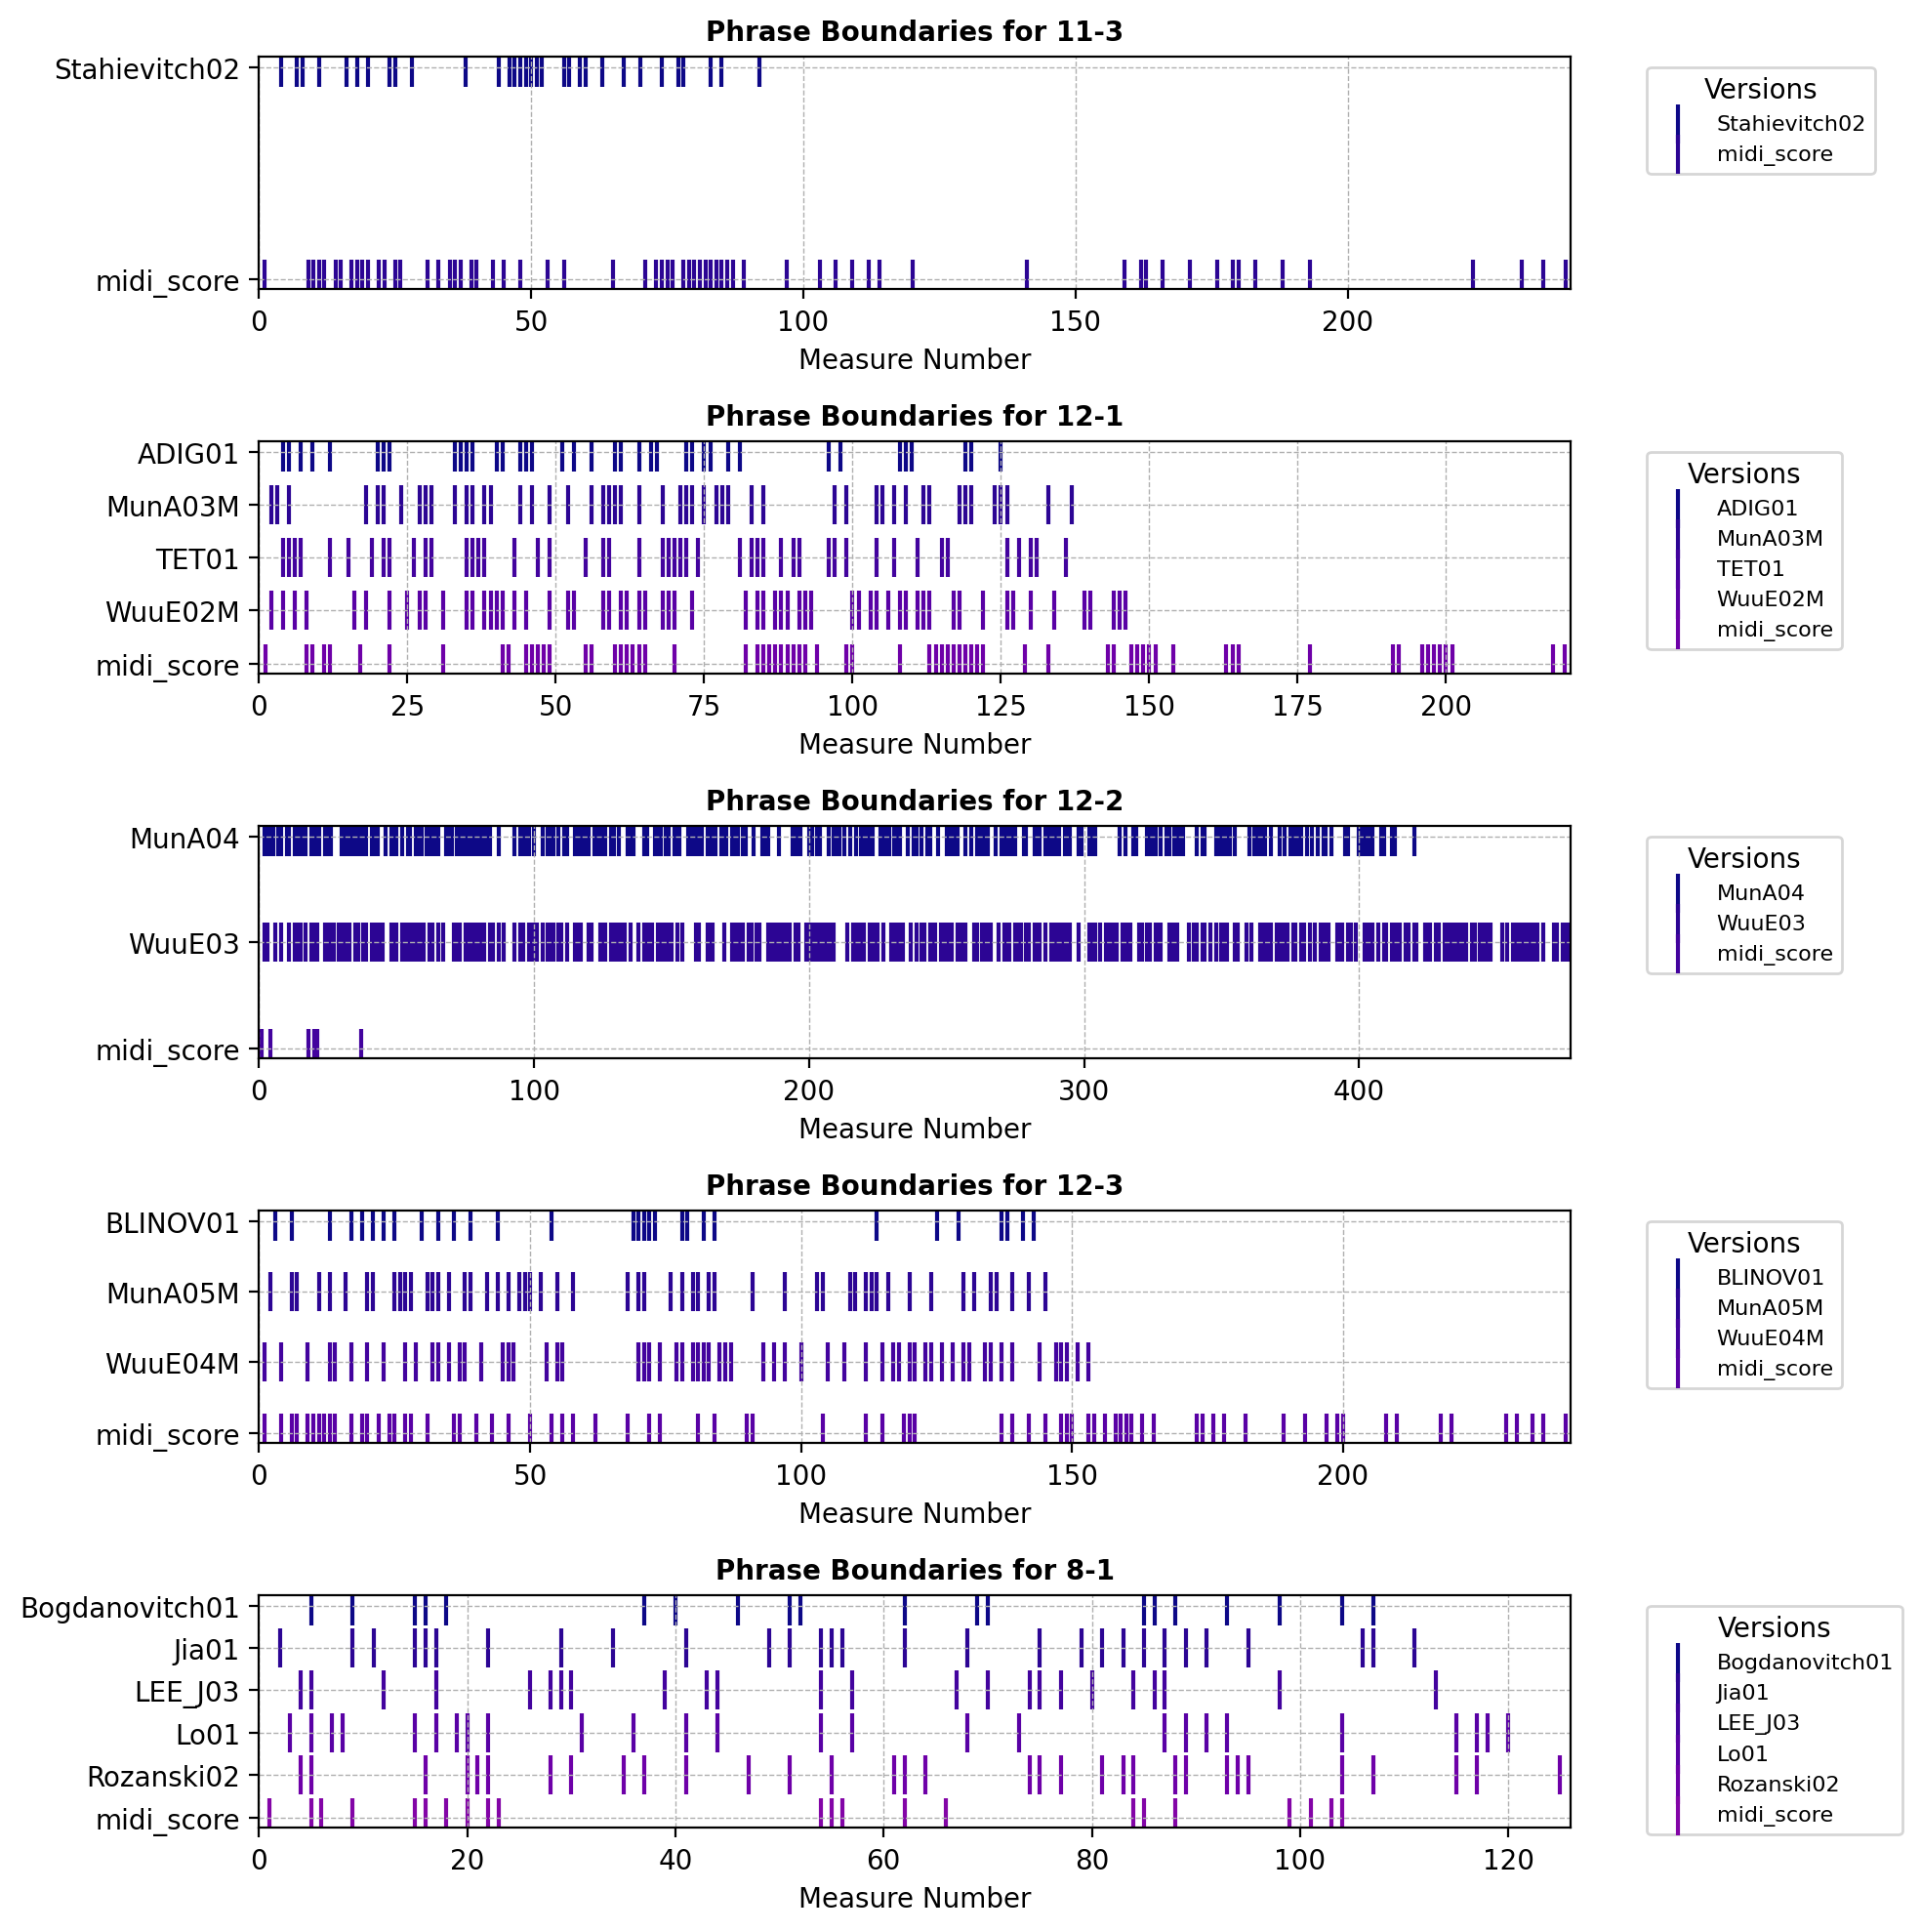

In [ ]:
model_p_velocity_results = {**model_velocity_performed_results, **model_velocity_unperformed_results}
plot_boundaries(model_p_velocity_results)

Piece: 11-3, Average Phrase Count: 66.00, Average Phrase Length: 3.62
Piece: 12-1, Average Phrase Count: 71.00, Average Phrase Length: 3.08
Piece: 12-2, Average Phrase Count: 5.00, Average Phrase Length: 7.20
Piece: 12-3, Average Phrase Count: 76.00, Average Phrase Length: 3.16
Piece: 8-1, Average Phrase Count: 21.00, Average Phrase Length: 4.90


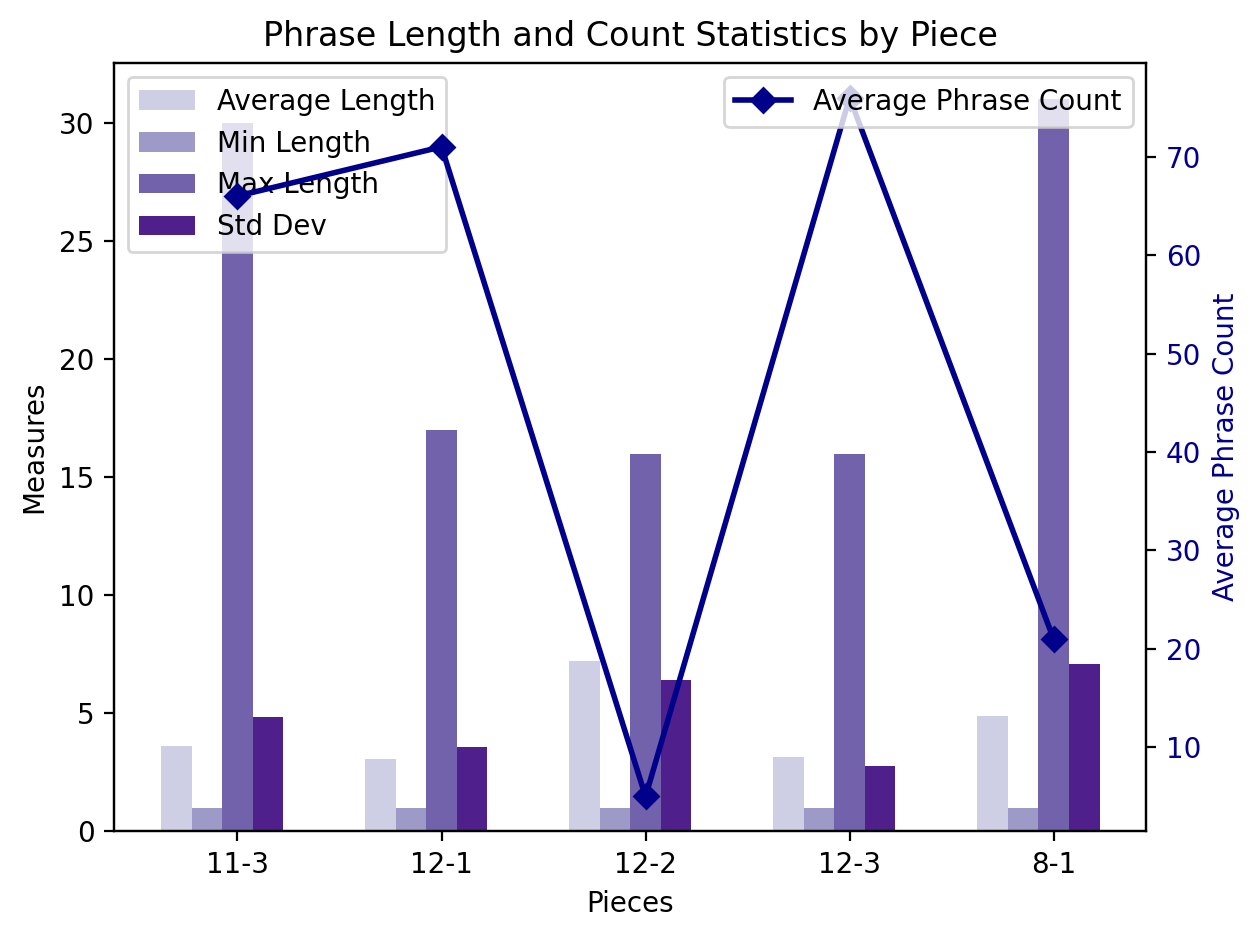

In [ ]:
analyze_and_plot_phrase_statistics(model_velocity_unperformed_results)

Piece: 11-3, Average Phrase Count: 66.00, Average Phrase Length: 3.62
Piece: 12-1, Average Phrase Count: 71.00, Average Phrase Length: 3.08
Piece: 12-2, Average Phrase Count: 5.00, Average Phrase Length: 7.20
Piece: 12-3, Average Phrase Count: 76.00, Average Phrase Length: 3.16
Piece: 8-1, Average Phrase Count: 21.00, Average Phrase Length: 4.90


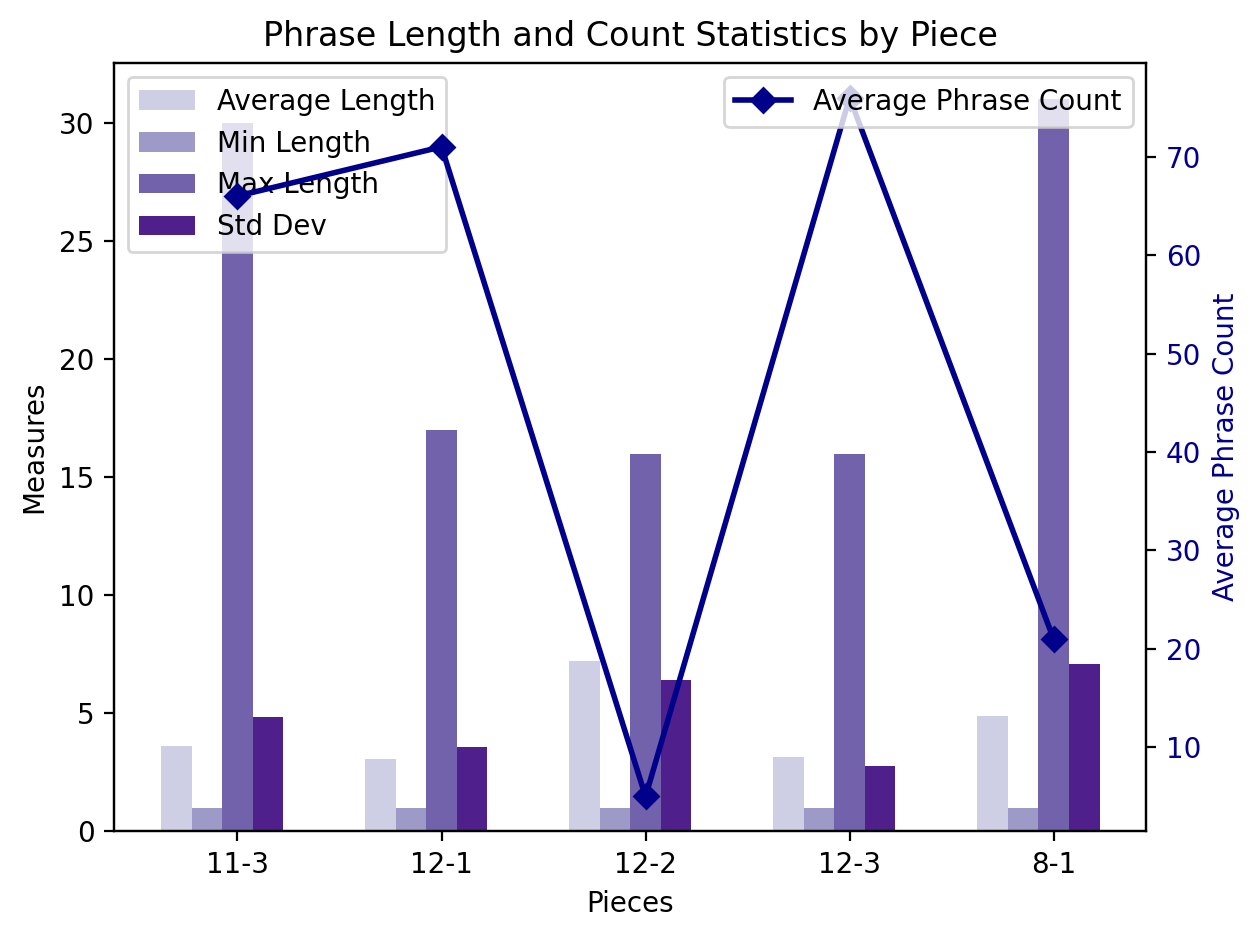

In [ ]:
analyze_and_plot_phrase_statistics(model_velocity_unperformed_results)

Piece: 11-3, Average Phrase Count: 48.50, Average Phrase Length: 3.37
Piece: 12-1, Average Phrase Count: 53.80, Average Phrase Length: 2.79
Piece: 12-2, Average Phrase Count: 193.00, Average Phrase Length: 1.60
Piece: 12-3, Average Phrase Count: 55.25, Average Phrase Length: 3.05
Piece: 8-1, Average Phrase Count: 24.67, Average Phrase Length: 4.47


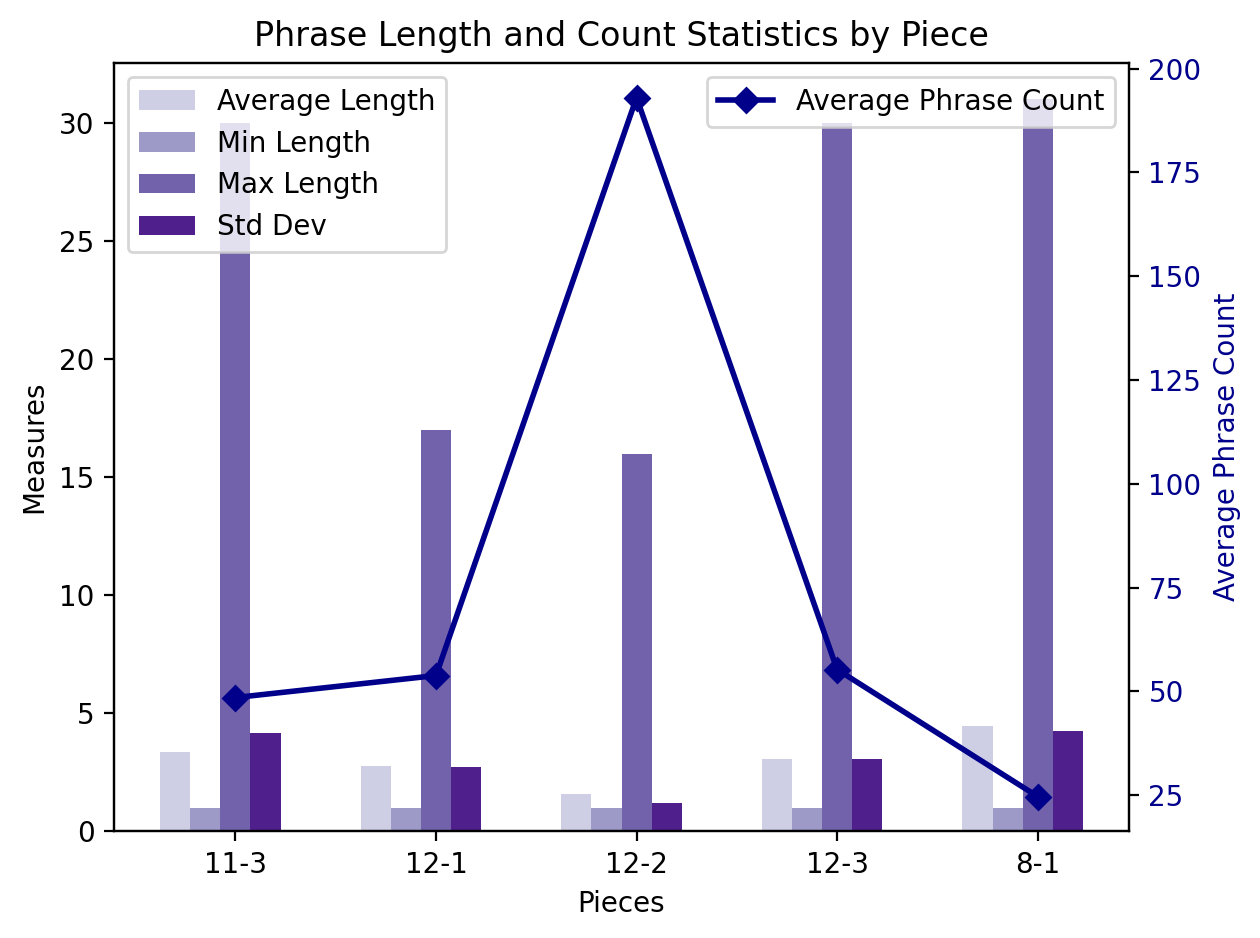

In [ ]:
analyze_and_plot_phrase_statistics(model_p_velocity_results)

### Using Model_P_cadence

In [ ]:
def apply_model_p_cadence_to_midis(midis):
    """
    Apply the Model_P_condence function to a dictionary of MIDI streams, print and save the phrase boundaries for each MIDI file.

    Args:
        midis (dict): Dictionary with keys as (directory name, filename) and values as music21.stream.Score objects.

    Returns:
        dict: Dictionary with the same keys and values as lists of phrase boundaries.
    """
    results = {}
    for key, midi_stream in midis.items():
        # Apply the Model_P_velocity function
        boundaries = Model_P_cadence(midi_stream)

        # Print the results
        dir_name, file_name = key
        print(f"'{file_name}' in '{dir_name}' has phrase boundaries at: {boundaries}")

        # Save the results
        results[key] = boundaries

    return results

In [ ]:
print("Performed MIDI files' Phrase Boundaries using model_p_cadence:")
model_cadence_performed_results = apply_model_p_cadence_to_midis(performed_midis)

print("\nNon-Performed MIDI files' Phrase Boundaries using model_p_velocity:")
model_cadence_unperformed_results = apply_model_p_cadence_to_midis(non_performed_midis)

Performed MIDI files' Phrase Boundaries using model_p_cadence:
'Stahievitch02.mid' in '11-3' has phrase boundaries at: [23, 24, 25, 26, 28, 47, 49, 52, 74, 77]
'ADIG01.mid' in '12-1' has phrase boundaries at: [46, 53, 58, 59, 113]
'MunA03M.mid' in '12-1' has phrase boundaries at: [24]
'TET01.mid' in '12-1' has phrase boundaries at: [49, 111, 131]
'WuuE02M.mid' in '12-1' has phrase boundaries at: [53, 68]
'MunA04.mid' in '12-2' has phrase boundaries at: []
'WuuE03.mid' in '12-2' has phrase boundaries at: []
'BLINOV01.mid' in '12-3' has phrase boundaries at: [14, 17, 54, 56, 64, 84, 138, 141]
'MunA05M.mid' in '12-3' has phrase boundaries at: [13, 16, 46, 52, 55, 136]
'WuuE04M.mid' in '12-3' has phrase boundaries at: [14, 17, 55, 58, 148]
'Bogdanovitch01.mid' in '8-1' has phrase boundaries at: [115]
'Jia01.mid' in '8-1' has phrase boundaries at: [68, 75, 81, 91]
'LEE_J03.mid' in '8-1' has phrase boundaries at: [70]
'Lo01.mid' in '8-1' has phrase boundaries at: [54, 120]
'Rozanski02.mid' i

<ipython-input-34-1a61d0396cd3>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(results))


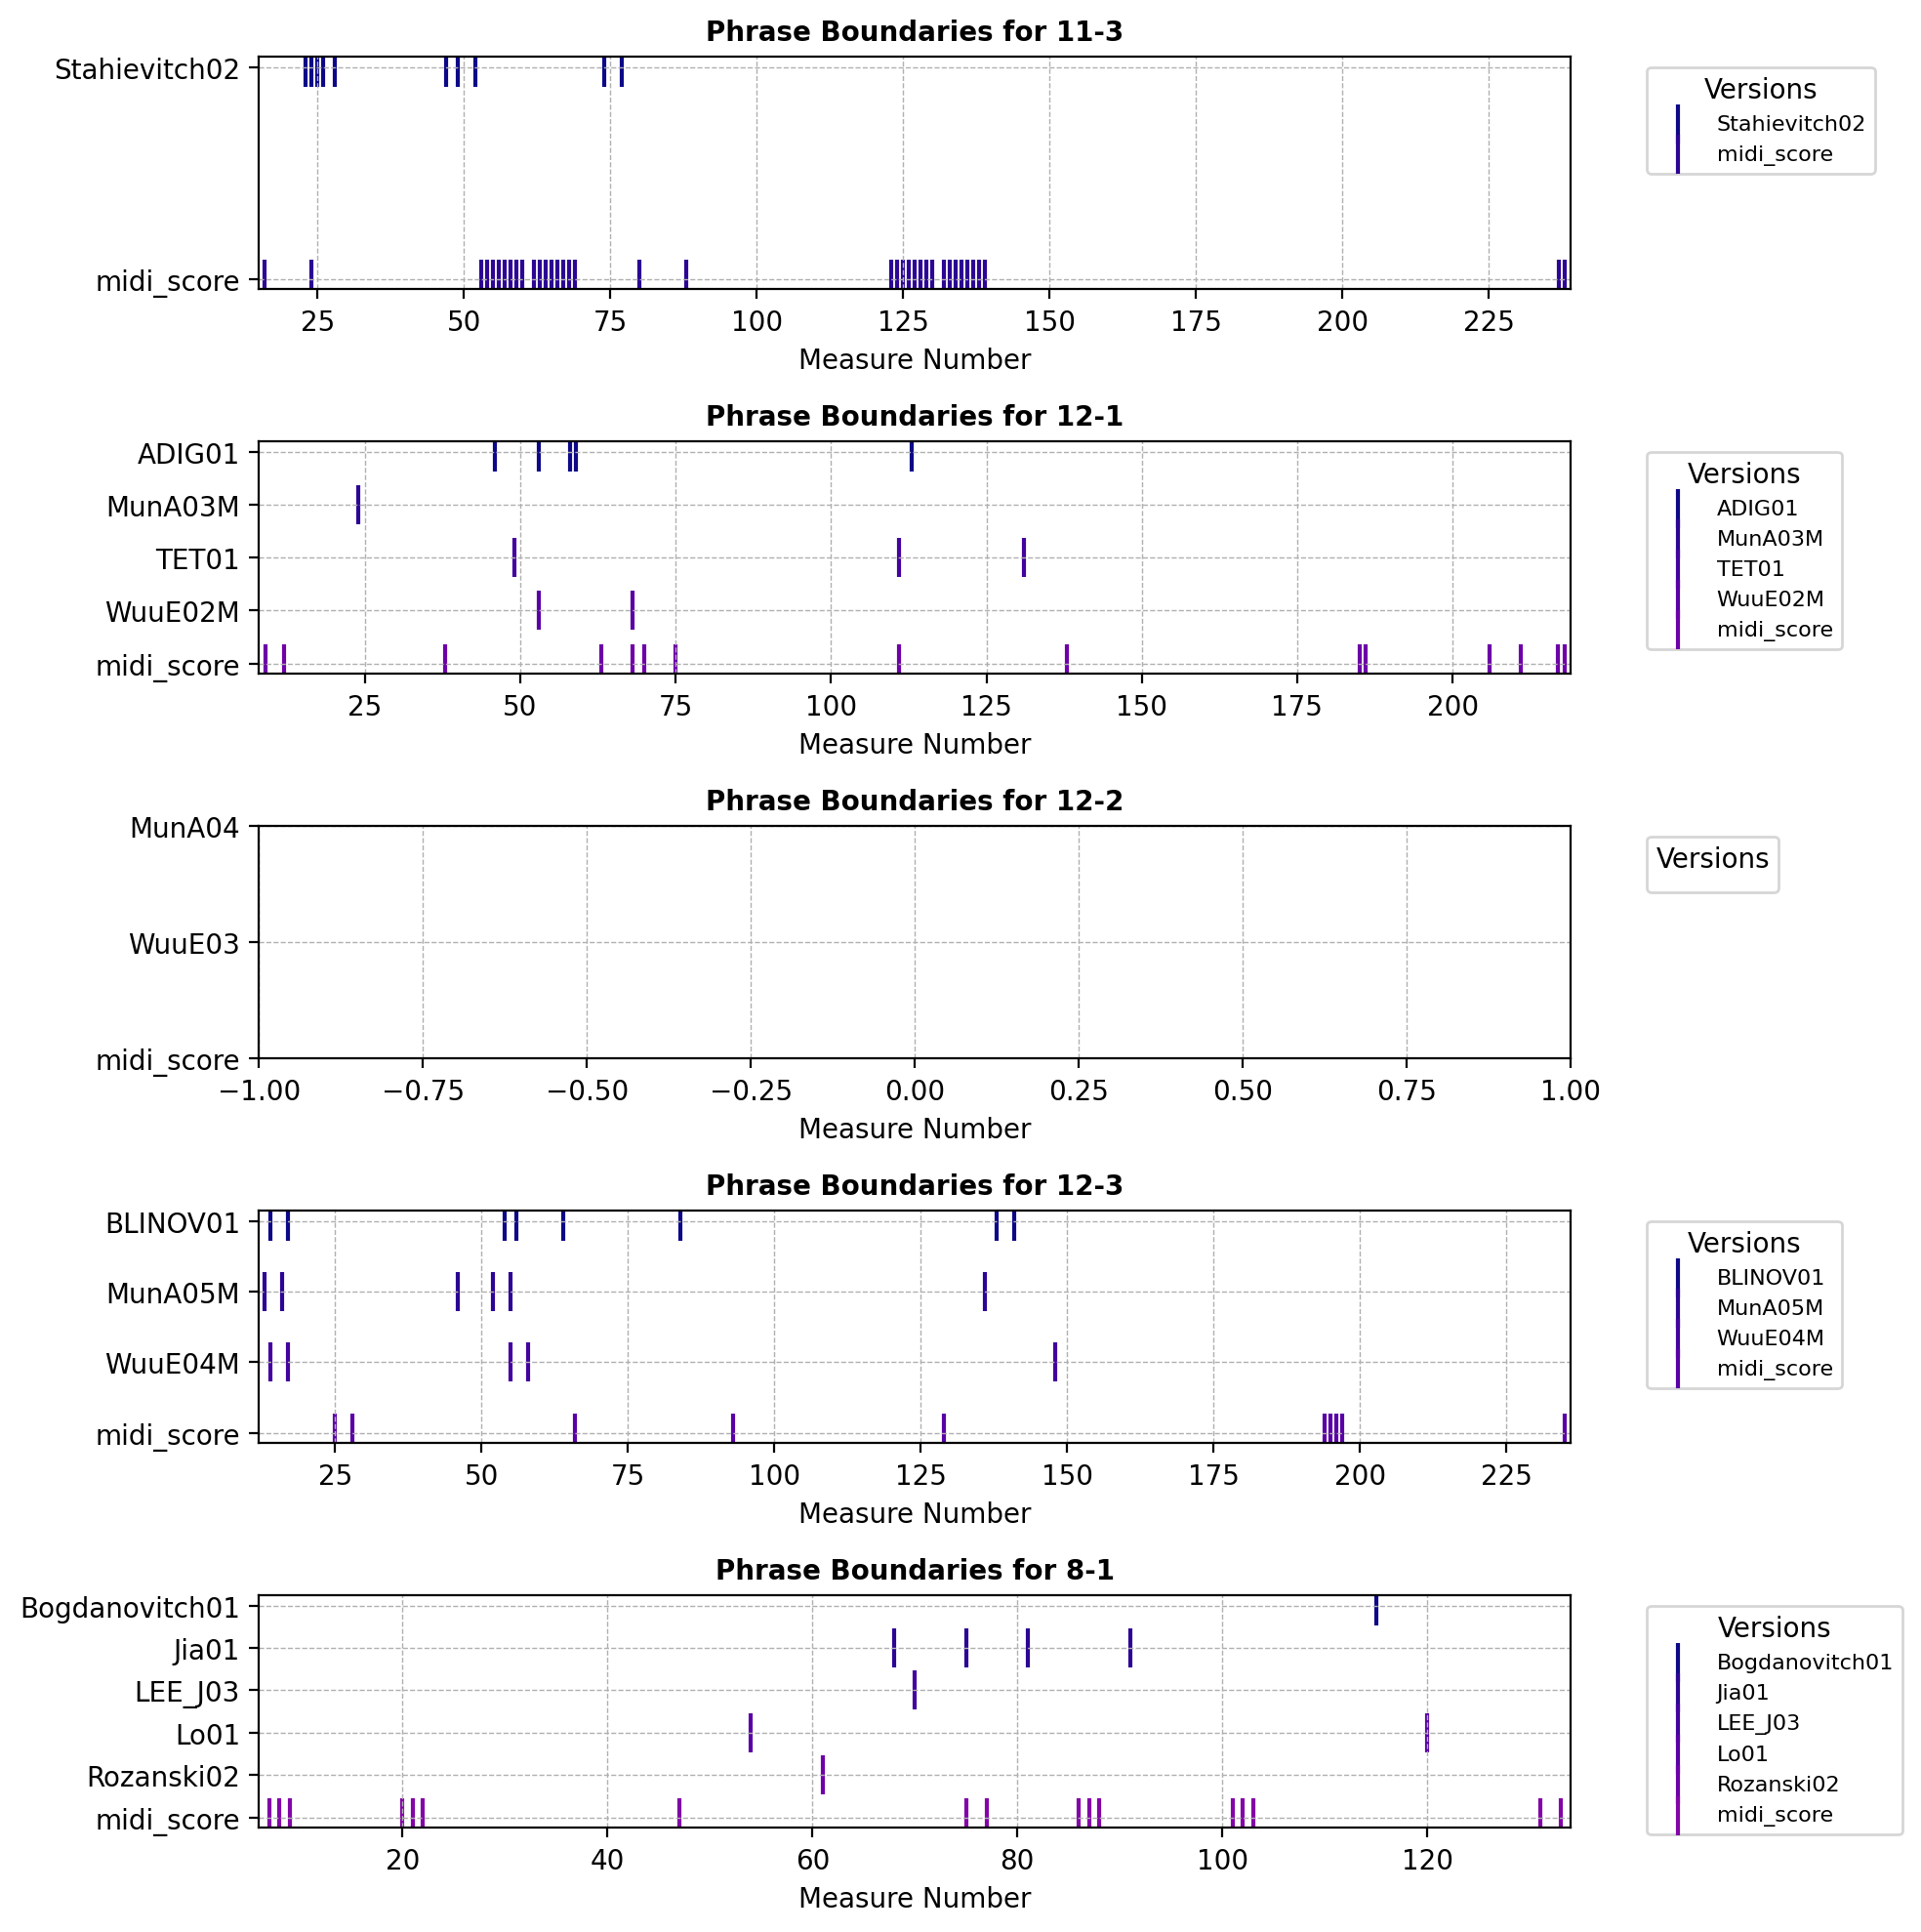

In [ ]:
model_p_cadence_results = {**model_cadence_performed_results, **model_cadence_unperformed_results}
plot_boundaries(model_p_cadence_results)

Piece: 11-3, Average Phrase Count: 37.00, Average Phrase Length: 6.00
Piece: 12-1, Average Phrase Count: 14.00, Average Phrase Length: 14.93
Piece: 12-2, Average Phrase Count: 0.00, Average Phrase Length: 0.00
Piece: 12-3, Average Phrase Count: 9.00, Average Phrase Length: 23.33
Piece: 8-1, Average Phrase Count: 16.00, Average Phrase Length: 7.88


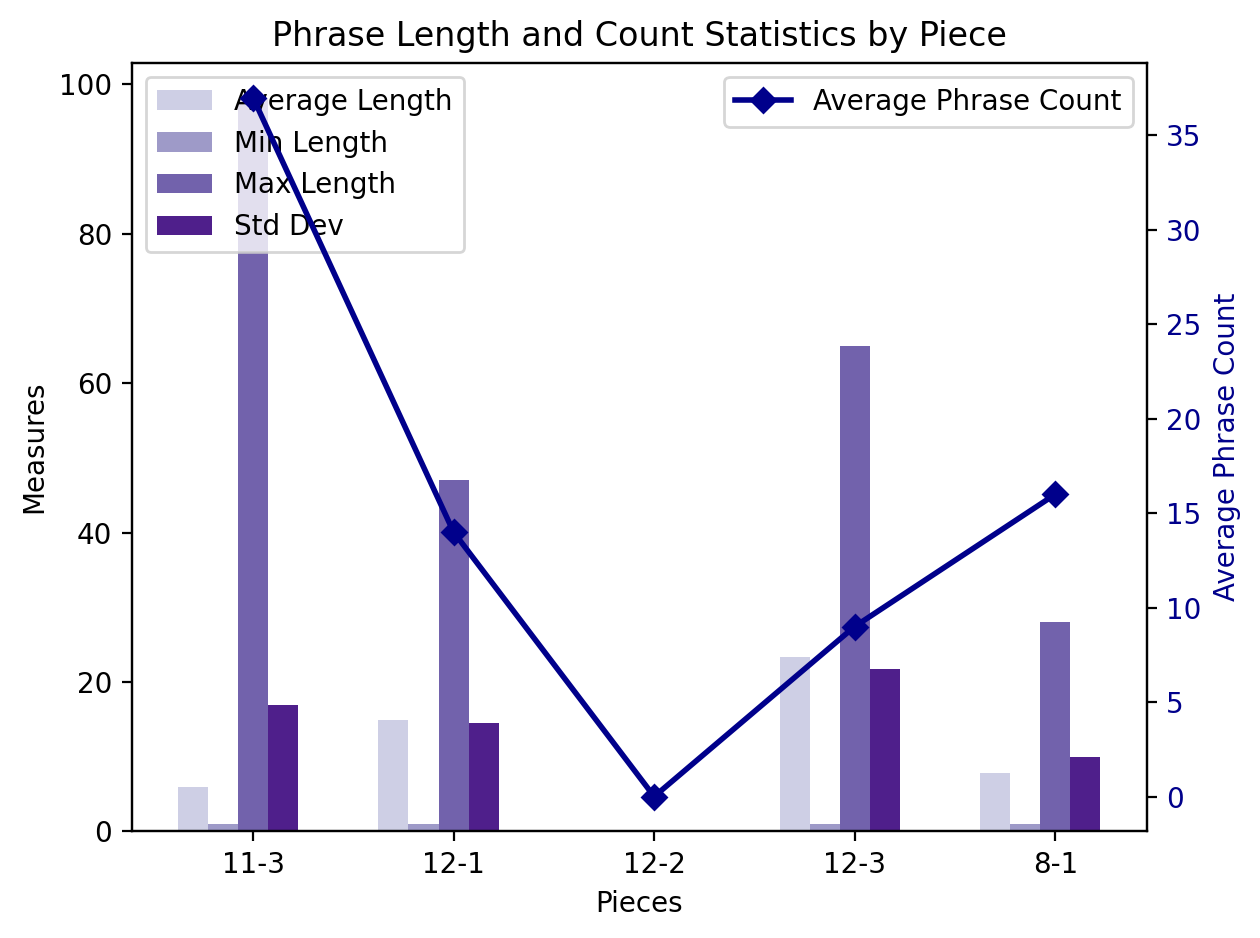

In [ ]:
analyze_and_plot_phrase_statistics(model_cadence_unperformed_results)

Piece: 11-3, Average Phrase Count: 9.00, Average Phrase Length: 6.00
Piece: 12-1, Average Phrase Count: 2.33, Average Phrase Length: 23.43
Piece: 12-2, Average Phrase Count: 0.00, Average Phrase Length: 0.00
Piece: 12-3, Average Phrase Count: 5.33, Average Phrase Length: 24.00
Piece: 8-1, Average Phrase Count: 2.00, Average Phrase Length: 22.25


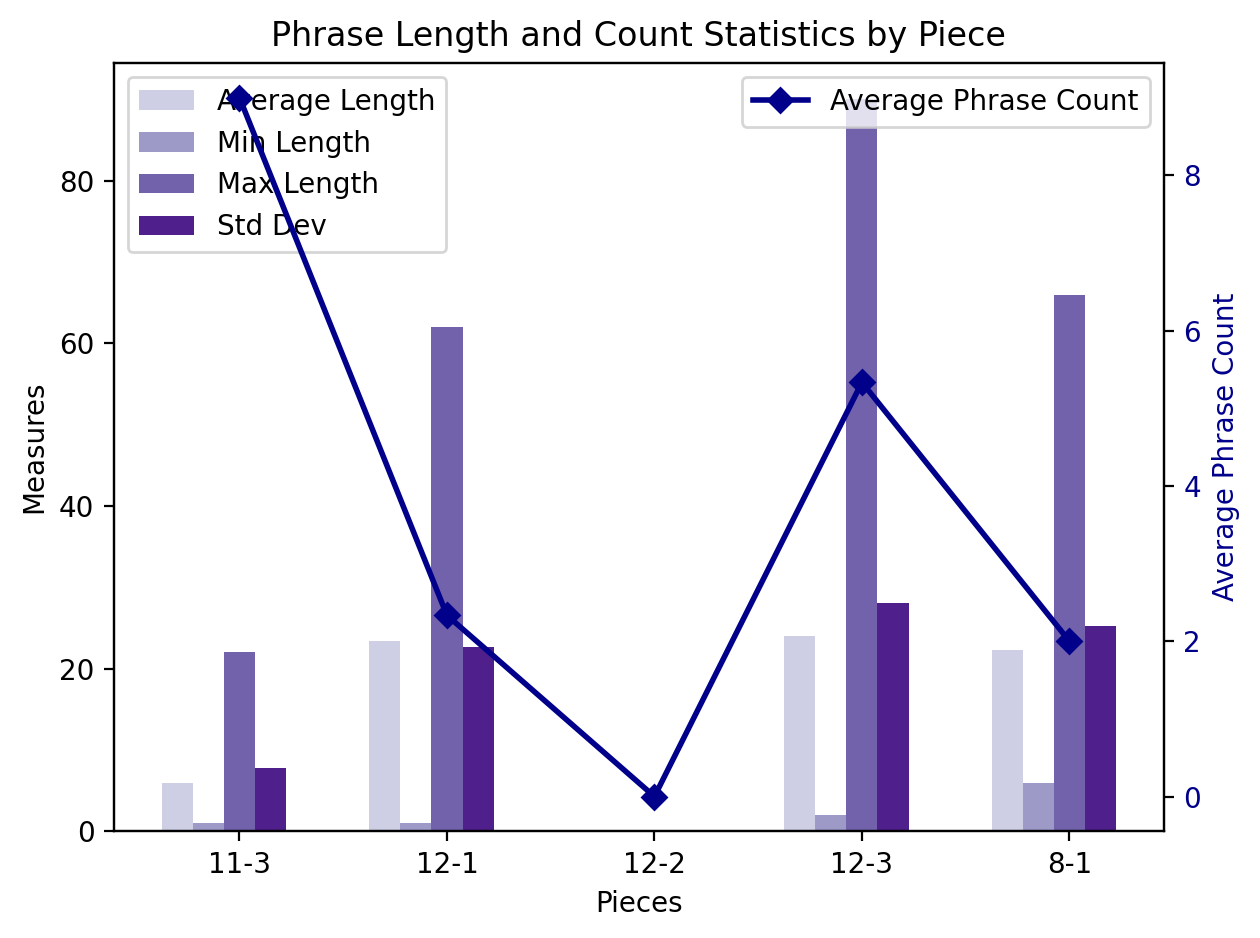

In [ ]:
analyze_and_plot_phrase_statistics(model_cadence_performed_results)

Piece: 11-3, Average Phrase Count: 23.00, Average Phrase Length: 6.00
Piece: 12-1, Average Phrase Count: 5.25, Average Phrase Length: 17.76
Piece: 12-2, Average Phrase Count: 0.00, Average Phrase Length: 0.00
Piece: 12-3, Average Phrase Count: 6.25, Average Phrase Length: 23.76
Piece: 8-1, Average Phrase Count: 6.67, Average Phrase Length: 10.75


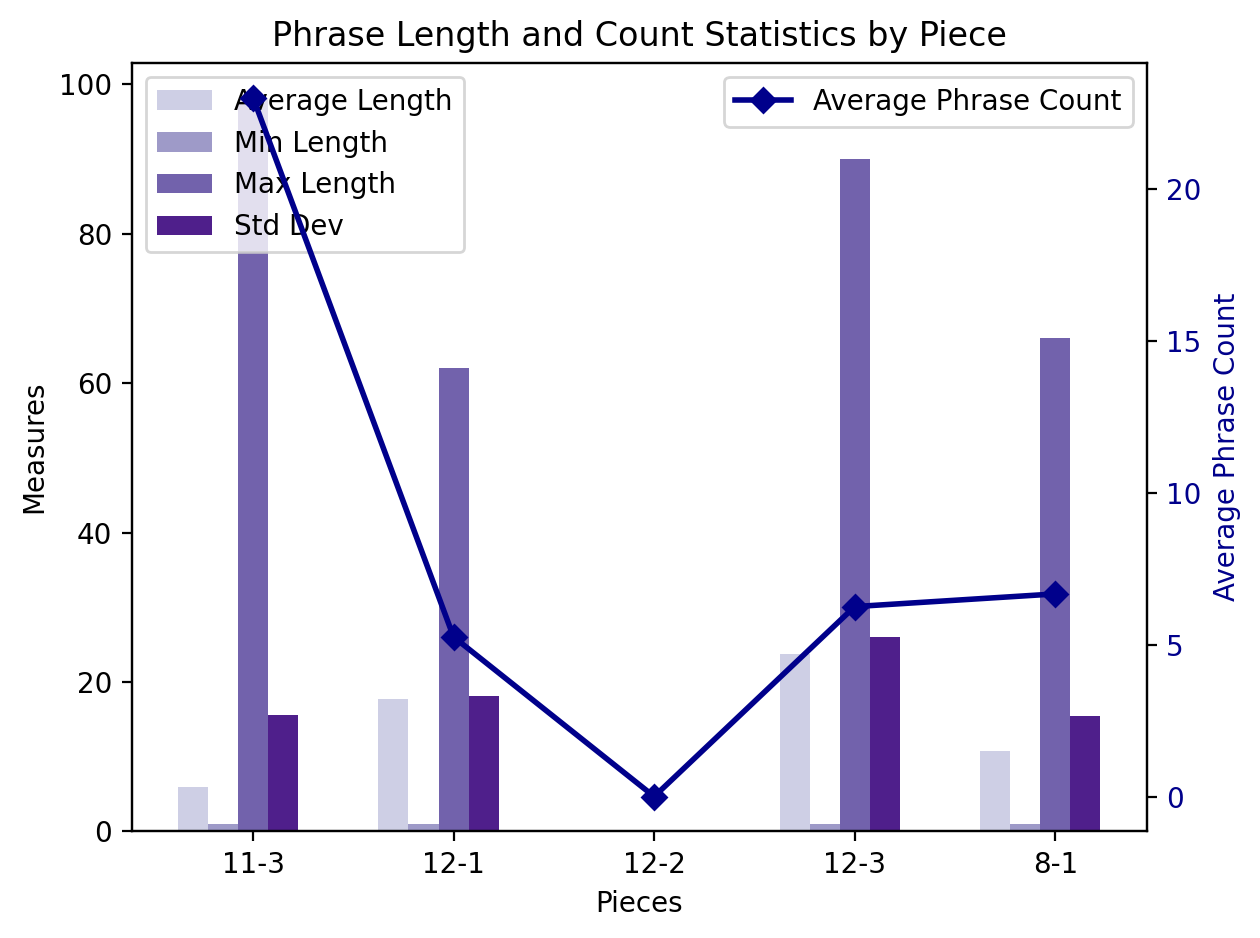

In [ ]:
analyze_and_plot_phrase_statistics(model_p_cadence_results)

### Using Model_P_velocity_with_SSM_Euclidean_Distance

In [ ]:
def apply_Model_P_velocity_with_SSM(midis):
    """
    Apply the Model_P_velocity_with_SSM_Euclidean_Distance function to a dictionary of MIDI streams, print and save the phrase boundaries for each MIDI file.

    Args:
        midis (dict): Dictionary with keys as (directory name, filename) and values as music21.stream.Score objects.

    Returns:
        dict: Dictionary with the same keys and values as lists of phrase boundaries.
    """
    results = {}
    for key, midi_stream in midis.items():
        # Apply the Model_P_velocity function
        boundaries = Model_P_velocity_with_SSM(midi_stream)

        # Print the results
        dir_name, file_name = key
        print(f"'{file_name}' in '{dir_name}' has phrase boundaries at: {boundaries}")

        # Save the results
        results[key] = boundaries

    return results

In [ ]:
print("Performed MIDI files' Phrase Boundaries using apply_Model_P_velocity_with_SSM_Euclidean_Distance:")
model_SSM_performed_results = apply_Model_P_velocity_with_SSM(performed_midis)

print("\nNon-Performed MIDI files' Phrase Boundaries using model_p_velocity:")
model_SSM_unperformed_results = apply_Model_P_velocity_with_SSM(non_performed_midis)

Performed MIDI files' Phrase Boundaries using apply_Model_P_velocity_with_SSM_Euclidean_Distance:
'Stahievitch02.mid' in '11-3' has phrase boundaries at: [4, 7, 8, 11, 16, 18, 20, 22, 23, 24, 25, 26, 27, 28, 38, 44, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 59, 60, 63, 67, 70, 74, 77, 78, 79, 82, 83, 85, 92, 93]
'ADIG01.mid' in '12-1' has phrase boundaries at: [4, 5, 6, 7, 9, 10, 12, 20, 21, 22, 25, 28, 31, 32, 33, 34, 35, 36, 39, 40, 41, 44, 45, 46, 51, 53, 56, 58, 59, 60, 61, 64, 66, 67, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 89, 91, 94, 96, 98, 101, 103, 105, 108, 109, 110, 113, 119, 120, 122, 125]
'MunA03M.mid' in '12-1' has phrase boundaries at: [3, 4, 5, 11, 12, 14, 17, 18, 20, 21, 22, 24, 27, 28, 29, 33, 35, 36, 38, 39, 44, 46, 48, 49, 52, 56, 58, 59, 60, 61, 64, 68, 71, 72, 73, 75, 77, 78, 79, 82, 83, 84, 85, 88, 91, 92, 96, 97, 99, 101, 103, 104, 105, 107, 109, 112, 113, 118, 119, 120, 124, 125, 126, 133, 135, 137]
'TET01.mid' in '12-1' has phrase boundaries at: [5, 6, 7, 12, 1

<ipython-input-34-1a61d0396cd3>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(results))


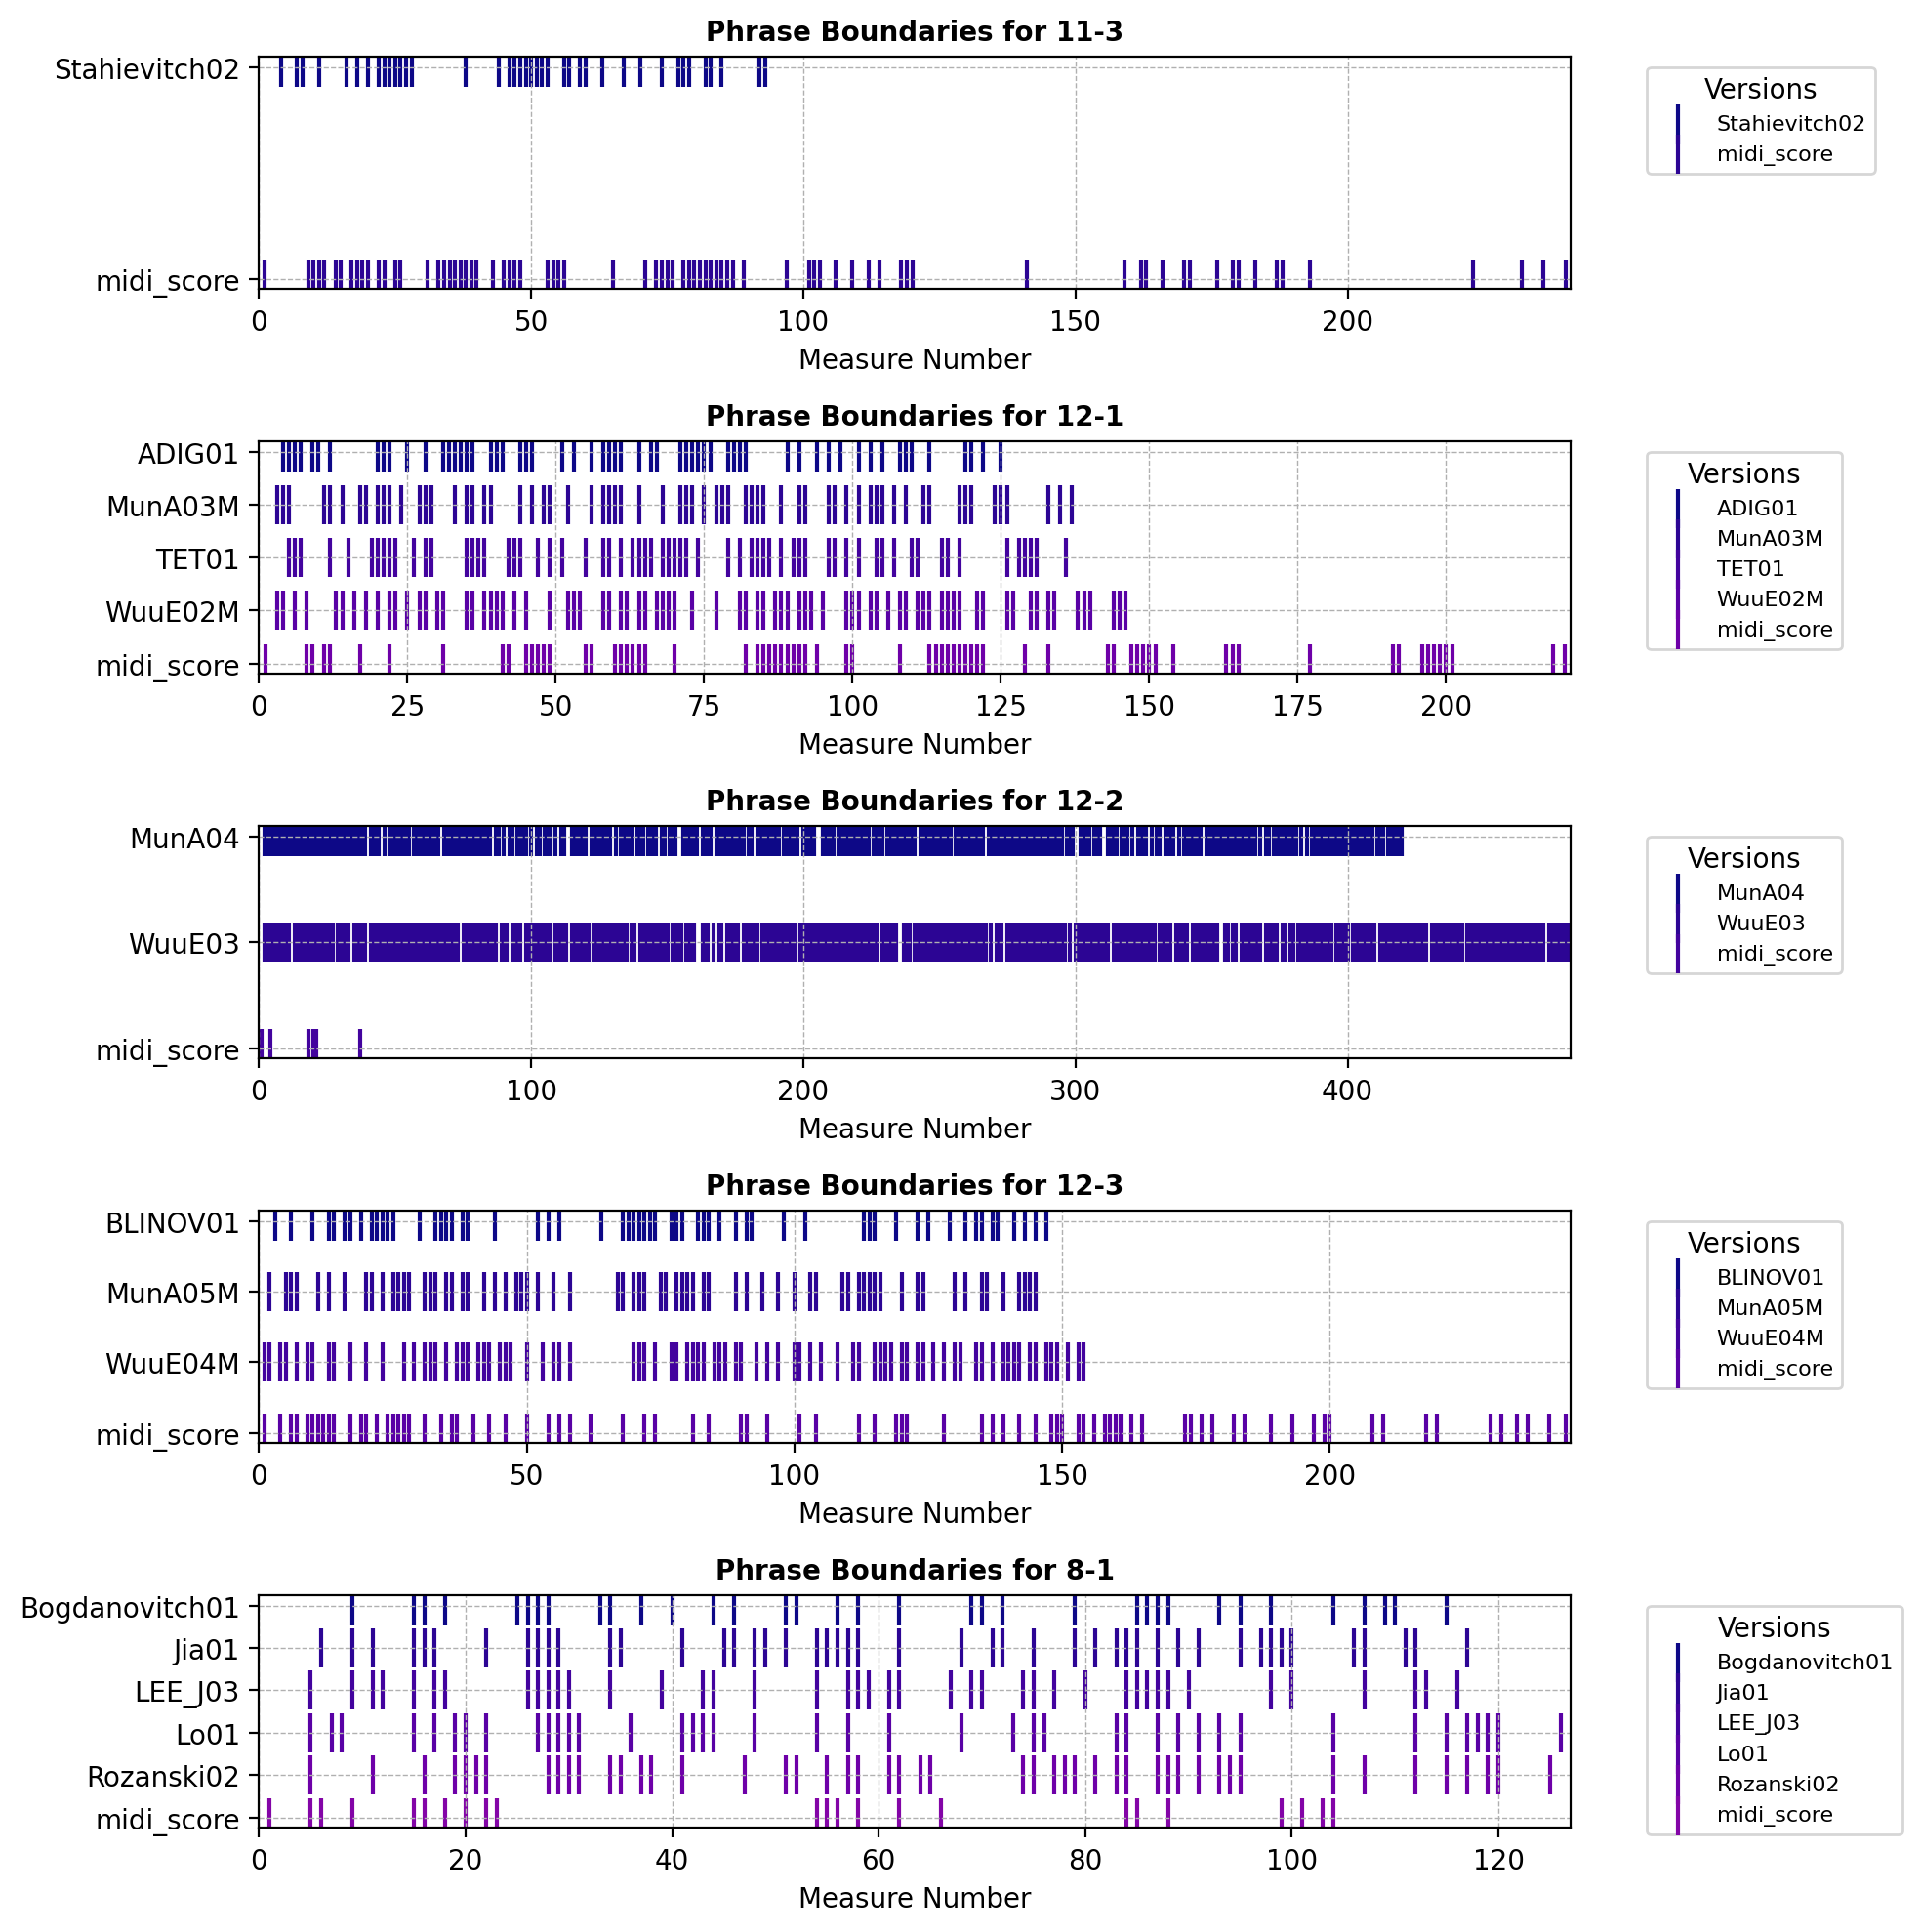

In [ ]:
model_p_SSM_results = {**model_SSM_performed_results, **model_SSM_unperformed_results}
plot_boundaries(model_p_SSM_results)

Piece: 11-3, Average Phrase Count: 39.00, Average Phrase Length: 2.28
Piece: 12-1, Average Phrase Count: 66.75, Average Phrase Length: 1.98
Piece: 12-2, Average Phrase Count: 391.50, Average Phrase Length: 1.15
Piece: 12-3, Average Phrase Count: 70.00, Average Phrase Length: 2.10
Piece: 8-1, Average Phrase Count: 41.80, Average Phrase Length: 2.72


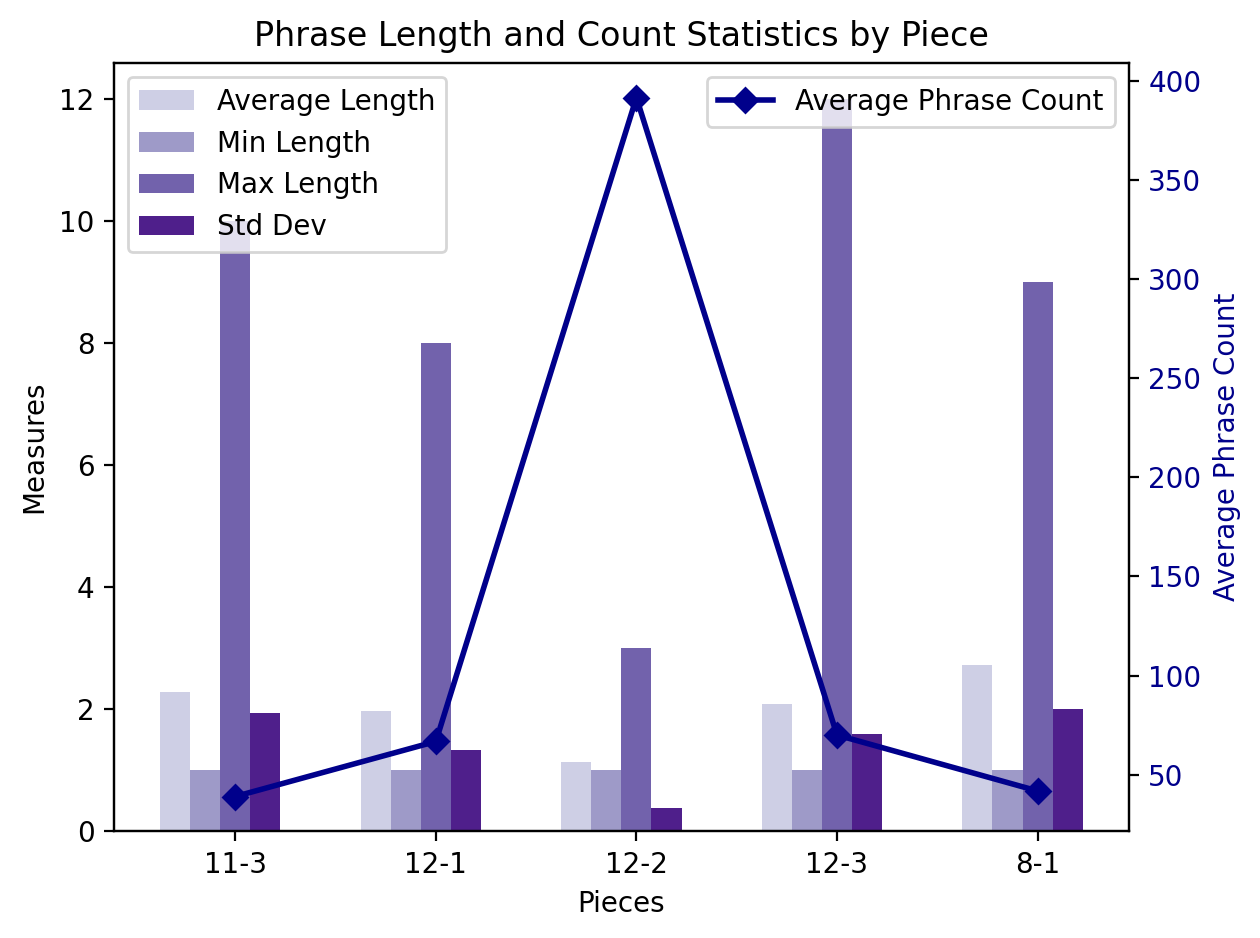

In [ ]:
analyze_and_plot_phrase_statistics(model_SSM_performed_results)

Piece: 11-3, Average Phrase Count: 78.00, Average Phrase Length: 3.06
Piece: 12-1, Average Phrase Count: 71.00, Average Phrase Length: 3.08
Piece: 12-2, Average Phrase Count: 5.00, Average Phrase Length: 7.20
Piece: 12-3, Average Phrase Count: 84.00, Average Phrase Length: 2.89
Piece: 8-1, Average Phrase Count: 22.00, Average Phrase Length: 4.68


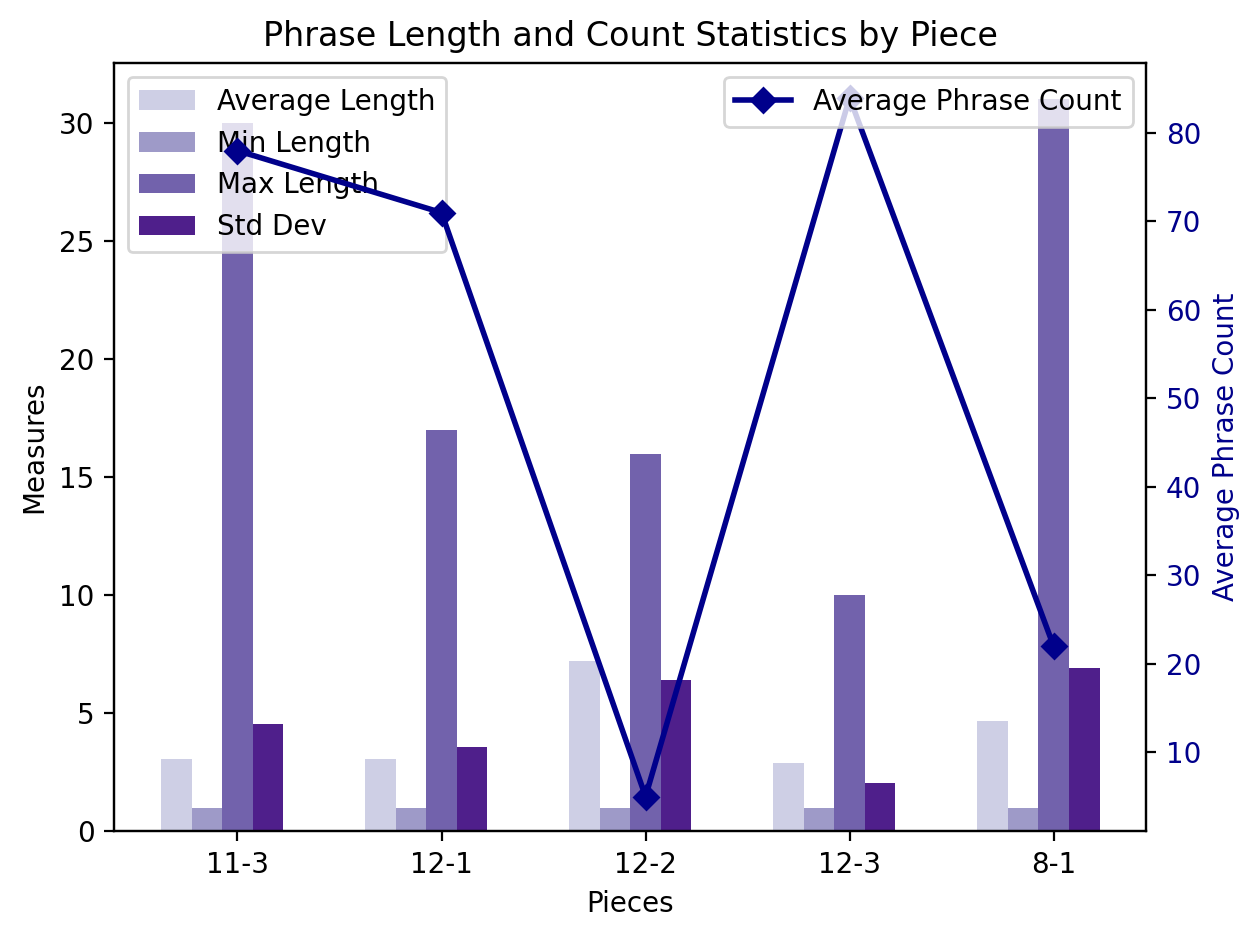

In [ ]:
analyze_and_plot_phrase_statistics(model_SSM_unperformed_results)

Piece: 11-3, Average Phrase Count: 58.50, Average Phrase Length: 2.80
Piece: 12-1, Average Phrase Count: 67.60, Average Phrase Length: 2.21
Piece: 12-2, Average Phrase Count: 262.67, Average Phrase Length: 1.18
Piece: 12-3, Average Phrase Count: 73.50, Average Phrase Length: 2.32
Piece: 8-1, Average Phrase Count: 38.50, Average Phrase Length: 2.91


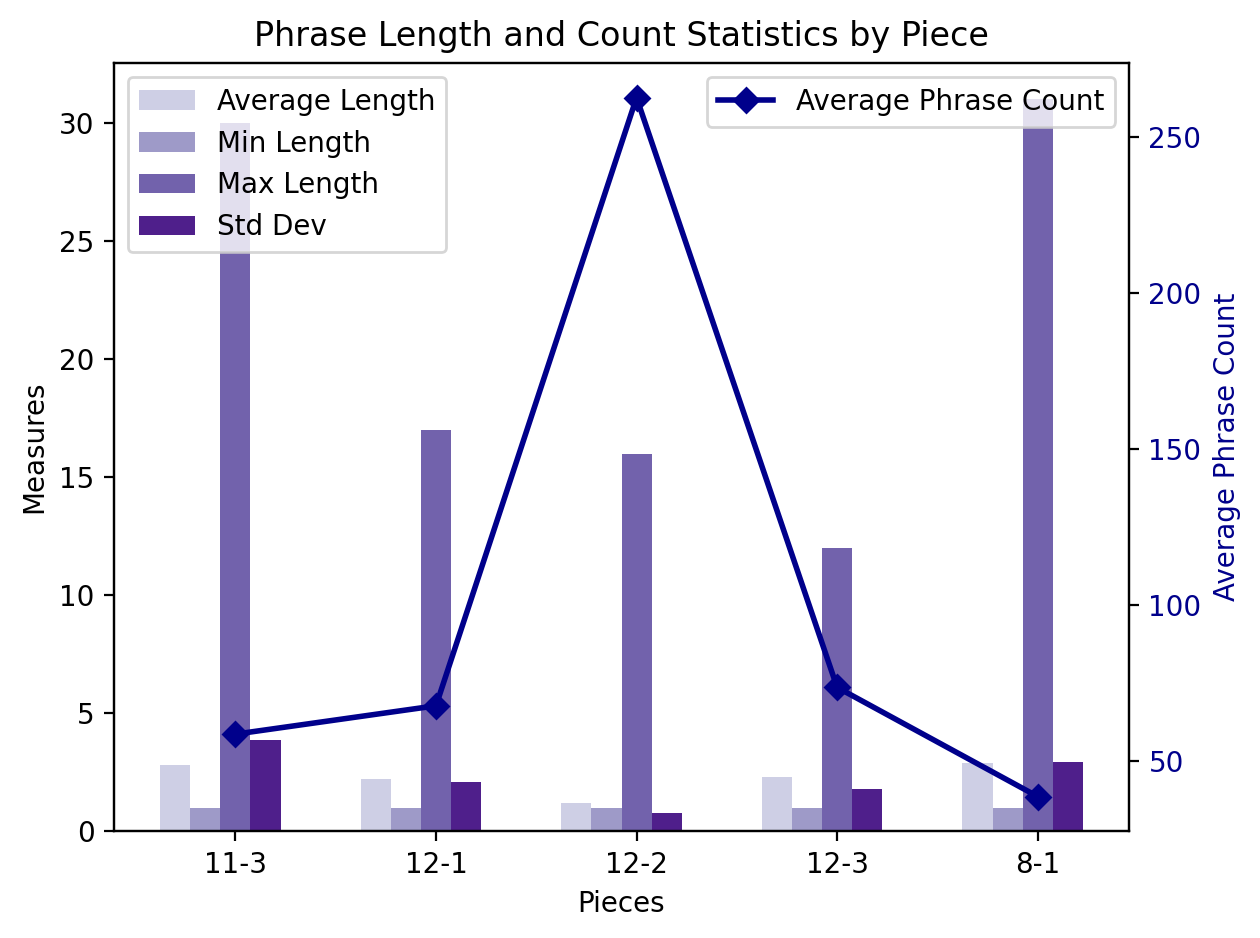

In [ ]:
analyze_and_plot_phrase_statistics(model_p_SSM_results)